# Project Robo_Bohr by Selahiye Aras

**Assignment**: You   will   develop   a   code   to   predict   atomization   energies   of   molecules.   The   dataset(roboBohr.csv),  contains ground  state energies of 16,242 molecules calculated  by quantummechanical simulations.The data contains 1277 columns. The first 1275 columns are entries in the Coulomb matrixthat act as molecular features. The 1276th column is the  Pubchem  Id where the molecularstructures   are   obtained.   The   1277th   column   is   the   atomization   energy   calculated   bysimulations   using   the  Quantum  Espresso  package.   The   data   is   used   for   a  publication  inJournal of Chemical Physics.You must analyze the data (histogram, variance, NaN values, non significative variables, ...).After   that   you   will   search   the  best   model   to   predict   Atomization   energies   using   Coulummatrix.You can use any (one or several) tools of scikit-learn : Regression, Scaling, normalization,train_test_split,  GridSearchCV, ... However,  you cannot use any other ML libraries(as Tensorflow, XGBoost,..).

**Planning**
Let's break down the steps of what we want to achieve by the code using the instructions of the assignement:

### Part A. Analyze the data: 
* histogram 
* variance 
* standard deviation
* NaN values
* non significative variables 


### Part B. Modelisation
#### I)Dimension Reduction 
* Choosing an Unsupervised Lerning method for reducing the dimension of the features

#### II)Regression Models
We search for the best model to predict the Atomization energies after reducting the dimension.
In order to do so we will compare several models:
* Linear regression
* Polynomial Regression
* Ridge Regression
* Lasso Regression
* SVR (Support vector Regression)
* Trees Regression
* k-Nearest Neighbors
* Random Forest Regression

#### III) Visualizing and Comparing the Results
* Comparing the Regression metrics
* Visual distinction between the KDE plots
* KL divergence

#### IV) Ensemble Learning
* GradientBoostingRegressor
* Stacking
* Voting
* Second-level ensemble

# Beginning of the code

Let's start by importing the libraries that we are likely to use in a seperate cell before diving into the code itself. Note that most of the libraries are imported along the writing process, and some are not used since some none-functionning code cells are deleted for presentation purposes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## Part A) Analyze the Data

We can start by importing the data set that we will be working with from the professor's repository and put it into a dataframe directly called df_robo, containing very element of the default file. Additionnaly let's drop the Unnamed: 0, pubchem_id and Eat columns and put the remaining columns as features into a dataframe called X. They are the values that we are going to work with. We can put the Eat column into a df named Y, the output of the computation of Quantum Espresso package. 

In [2]:
# Reading the data as DF, defining the X's and Y
df_robo = pd.DataFrame(pd.read_csv("roboBohr.csv"))

Y = df_robo.loc[:, 'Eat'] #atomization energies
X = df_robo.drop(['Unnamed: 0','pubchem_id','Eat'], axis=1) # entries as features that act as molecular features

Let us see what the statistical information of X and Y are with the describe() method.

In [3]:
# Print the statistics of X and Y
print(X.describe(),'\n')
print(Y.describe())

                  0             1             2             3             4  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean     115.715266     22.445723     20.474191     18.529573     17.169350   
std      113.198503      8.659586      7.670481      6.485777      5.512560   
min       36.858105      2.906146      0.000000      0.000000      0.000000   
25%       73.516695     17.969345     16.228071     15.165862     13.744092   
50%       73.516695     20.662511     18.631287     17.690729     16.020040   
75%       73.516695     21.132432     20.739496     18.712895     18.297501   
max      388.023441     73.563510     66.269180     66.268891     66.268756   

                  5             6             7             8             9  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      15.816888     15.133152     14.471534     13.960759     13.464842   
std        4.179691      3.885091      3.503075    

**Remark on the print-out:** We can read for X that for each of the 1274 columns we have 16242 rows with different average, standard deviation, minima, maxima, the first quartile(the value below which 25% of the data are located), median and third quartile(the value below which 75% of the data are located).
We can also read for the Y dataframe the same information, only since we have just one column with a string label, the name and dtype is shown. All the datatypes are float64.

### Let's plot the histogram of the atomization Energies and its variance:

We want to plot the distribution of Atomization energies. Since we want to count the number of appereance of Y data, we only need the Y dataframe as input to the plot. We can achieve this by using plt.hist() method, where after several try we have concluded on setting bins=50 for adequate visualization. 

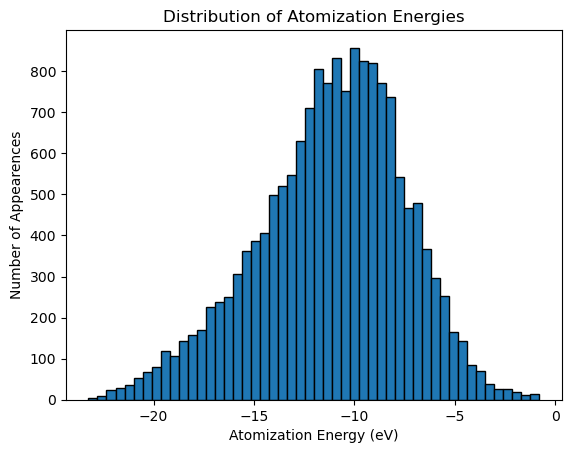

In [4]:
# Plot the Histogram of Atomization Anergies
plt.hist(Y, bins=50, edgecolor='black')
plt.title('Distribution of Atomization Energies')
plt.xlabel('Atomization Energy (eV)')
plt.ylabel('Number of Appearences')
plt.show()

**Remark on the print-out:** We observe a Bell-like ditribution for the Atomization Energies. Visualy, we see that Y dataframe's values belong to the I interval s.t. I=[-30, 0]. The describe() has given us I as I=[-23.245373, -0.789513] and the mean as A=-11.178969. Looking at the histogram A could be estimated as 10. 

Further on, we may ask if the distribution is a Normal distribution. We can apply the Shapiro-Wilk Test to see if that is the case.

In [5]:
from scipy.stats import shapiro
stat, p_value = shapiro(Y)
print('p value=',p_value)

p value= 3.163676418913958e-32


Here we get an extremely small p_value, which suggests that the observed Y distribution is significantly different from a normal distribution.

### More statistical analysis

#### Variance 

In [6]:
# Print variance of Y
Y_variance = Y.var()
print("Variance of Atomization Energies:", Y_variance)

Variance of Atomization Energies: 13.389252732084762


#### Standard deviation

In [7]:
# Print the standard deviation of Y
Y_std = Y.std()
print("Standard deviation of Atomization Energies:",Y_std)

Standard deviation of Atomization Energies: 3.6591327841559345


In [8]:
I = 23.245373 - 0.789513
print('Y_standard Deviation is ',I/Y_std,'times smaller that the I interval.')

Y_standard Deviation is  6.136934985588389 times smaller that the I interval.


**Remark on the print-out:** The Standard Deviation and the Variance tells us if the dispersion of the values accross the distribution. Compared to the extremities of the distribution interval I the Standard Deviation can be considered small and the dispersion a bit narrow. 

#### Let's see if the datas contain any **NaN values**:

We used X.isna.sum() to count the NaN values on the X dataframe. Since X contain many columns the sum is preformed over the column and the numerical result is given for the column.

In [9]:
# Check for NaNs and count them over their respective columns for features
nan_count_per_col_X = X.isna().sum(axis = 0)
print("NaN values count per column of features:\n", nan_count_per_col_X)

NaN values count per column of features:
 0       0
1       0
2       0
3       0
4       0
       ..
1270    0
1271    0
1272    0
1273    0
1274    0
Length: 1275, dtype: int64


**Remark on the print-out:** We may ask if there are non-zero values in the previous print-out and that we missed some NaNs. 

**Developpement:** To do a torought check, we can define a boolean variable to store the False state if any NaNs are found by applying the .isna.any() method to X. We don't need that developpement for the Y dataframe since it's only one column. 
We have developped another method before using .any(), which uses an increment and prints out the index of the NaN value if it existed, but finding no NaNs we simplified the method into the boolean one.

In [10]:
# Check for NaNs
nan_count_per_col_X = X.isna().sum()
arg = 0
for i in range(0,len(nan_count_per_col_X)):
    if nan_count_per_col_X[i] != 0:
        print(f"NaN values are found in the {i} column:\n")
        arg = arg + 1
if arg == 0:
    print("No NaN values in X")

No NaN values in X


In [11]:
nan_bool_X = X.isna().any()

if nan_bool_X.any():
    print('There is a NaN value somewhere in the DataFrame.')
else:
    print('No NaN values in the entire feature DataFrame.')

No NaN values in the entire feature DataFrame.


In [12]:
# Check for NaNs
nan_count_Y = Y.isna().sum()
print("NaN values count for the ouput dataframe:", nan_count_Y)

NaN values count for the ouput dataframe: 0


**Remark on the print-out:** It seems that there is not NaN values in the X and Y dataframes. 

#### Searching the Non significative variables.
We have chosen the correlation matrix method for distinguishing non-significative variables. 

In [12]:
df_corr = df_robo.drop(['Unnamed: 0','pubchem_id'], axis=1)
corr_matrix = df_corr.corr()
corr_matrix['Eat']

0       0.100467
1       0.104562
2       0.064153
3       0.025034
4      -0.022470
          ...   
1271   -0.140361
1272   -0.183995
1273   -0.140366
1274   -0.140660
Eat     1.000000
Name: Eat, Length: 1276, dtype: float64

**Remark on the print-out:** Since we want to find out the non-significant values, we can look at the values of corr_matrix["Eat"] with less than the absolute value of 0.2. This indicates a weak correlation.

In [13]:
weak_corr = corr_matrix.loc[abs(corr_matrix['Eat']) < 0.2  , ['Eat']]
print(weak_corr)

           Eat
0     0.100467
1     0.104562
2     0.064153
3     0.025034
4    -0.022470
...        ...
1270 -0.140353
1271 -0.140361
1272 -0.183995
1273 -0.140366
1274 -0.140660

[111 rows x 1 columns]


**Remark on the print-out:** Hence, we have found that 111 columns are weakly correlated to the Eat Colomn of the df_robo, with their indexes. A filtering out of those columns can be made if desired.

# Part B 

We have two dimension reduction algorithm that we may use before attempting any regression. Those are PCA and T-SNE. We have chosen to work with PCA before fitting the dataframe with regression models, because the T-SNE may reduce to much the feature dataframe and result in an underfitting and worst overall scores.  

## I) Reduction of Dimension 

First we need to normalize the features.

In [5]:
# Normalize features 
scaler = StandardScaler()
X_normed = scaler.fit_transform(X)

We need to find an adequate n_component for the Principle Component Analysis(PCA) method. Hence we choose to stop the search when a PCA with variance greater or equal to 0.95 is found and process further with that integer value. 

In [6]:
from sklearn.pipeline import Pipeline

variance_pca = 0.0
elapsed_time = 0.0

while (variance_pca < 0.95):
    for i in range(2, 16):
        # Create a PCA object
        pca = PCA(n_components=i, random_state=100)

        #  Pipeline with StandardScaler and PCA
        pipeline = Pipeline([('scaler', scaler), ('pca', pca)])

        # Record the starting time
        start_time = time.time()

        # Fit the pipeline to the normed data
        X_pca = pipeline.fit_transform(X_normed)

        # Record the end time
        end_time = time.time()

        # Compute the duration
        elapsed_time = end_time - start_time

        # Compute Variance
        variance_pca = pca.explained_variance_ratio_.sum()

        if variance_pca >= 0.95:
            break  # exit the loop if variance >= to 95

    print(f'Elapsed_time for n_component={i}: {elapsed_time} seconds')
    print('Explained Variance= ', variance_pca)

Elapsed_time for n_component=9: 1.1967990398406982 seconds
Explained Variance=  0.9517550690804247


We find that n_component=9 is suficient. In the regression models following we utilize X_pca as a primary feature dataframe containing less dimesion that the un-preprocessed X dataframe however capturing the the maximum variance in the X data. This will help us gain time and resources during the computation. 

## II) Searching the best Regression model

We Proceed on splitting the data into a training and testing sets, choosing the test_size as 30% of the total features, and random_state=42 for reproductibility of the splitting. We will do this once and use the same X_train, X_test, Y_train, Y_test variables throughout the project for better comparison between models. It is also important to note that we have used X_pca instead of X, so that the work done on I) is due it's worth.

In [7]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

Let's train a linear regression model to see the general proccess of fitting. We define the model and apply .fit() to train the model.

In [8]:
# Train a linear regression model
model_Linear = LinearRegression()
model_Linear.fit(X_train, Y_train)

LinearRegression()

We make the prediction using the trained set model_Linear by applying .predict(X_test).

In [9]:
# Make predictions on the test set
Y_pred_lin = model_Linear.predict(X_test)

Now we may evaluate our model by printing-out the Mean Squared Error (MSE) and the R^2 score. These two compares the Y_test to Y_pred_modelName. 

In [10]:
# Evaluate the model
mse_lin = mean_squared_error(Y_test, Y_pred_lin)
r2_lin = r2_score(Y_test,Y_pred_lin)
print("Linear Regression MSE:", mse_lin)
print("R2: ", r2_lin)

Linear Regression MSE: 2.0919278747543446
R2:  0.8424822380370534


Looking at the MSE and R2, we can clearly see from our first iteration of the program that the Linear Regression model fit is already a good approximation after the PCA with n_components=9.

We can continu by fitting with different models and compare their R^2, MSE and time of computation. Let's list the fitting models that we will apply:

* **a)Linear Regression**
* **b)SVR**
* **c)Polynomial Regression**
* **d)Decision Tree Regression**
* **e)Random Forest Regression**
* **f)Ridge Regression**
* **g)Lasso Regression** 
* **h)k-Nearest Neighbors**.

#### Hyperparameter Tunning, Computation Time and Scoring

For the previous list of Regression Models, in the following, we are using GridSearchCV() or RandomizedSearchCV() in order to find the best set of hyperparameters defined in the Name_model_param_grid. Depending on the model those parameters grid varry. We use the .best_params_ to find the best hyperparameters after the cross-validation. 

Note that for polynomial Rgression best_estimators_ was used instead of best_params_

Cross_Validation is set to 5 and RandomizedSearchCV with cv=2 is only used when the computation time exceeds 10 minutes. For most of the models GridSearchCV() is used, however for SVR in the cases we obtained a response, cv was low and even then we needed to use RandomizedSearch. We should keep in mind that the comparison between other models and SVR may be biased due to that choice if we want to compare SVR at all.

The computation time is calculated by creating a two independent variables start_time and end_time recording the time before and after the fitting. The elapsed_time is simply their difference and indicates the duration of the process. We chose to exclude the Hyperparameter tunning phase from the computation time and only concentrate on the fitting.

As a last parameter when performing the hyperparameter search we explicitely set the scoring as negative mean squared error. By negating the mean squared error, the grid search will effectively search for models that minimize the MSE.

We have written in the following the models in the same structure as the Linear Regression with the difference of Hyperparameter grid, Cross-validation tunning and computation time variables. Since we don't need to repeate the same explanation over and over, we have abstained from this repetition.

### a)Linear Regression

In [17]:
# Linear Regression
linear_model = LinearRegression()
linear_param_grid = {'normalize': [True, False]}

# Create a GridSearchCV object
linear_grid_search = GridSearchCV(linear_model, linear_param_grid, cv=5, scoring='neg_mean_squared_error')

# Record the strat time
start_time = time.time()

#Fit
linear_model_fit = linear_grid_search.fit(X_train, Y_train)

# Mark the end time
end_time=time.time()

# Compute the duration
elapsed_time = end_time - start_time

# Make predictions on the test set
Y_pred_Lin = model_Linear.predict(X_test)

# Compute MSE and R^2
mse_Lin = mean_squared_error(Y_test, Y_pred_Lin)
r2_lin = r2_score(Y_test,Y_pred_Lin)

# Print-out
print("Linear Regression:")
print('Elapsed_time: ', elapsed_time)
print(f"Best parameters: {linear_grid_search.best_params_}")
print(f"Mean squared error: {mse_Lin}")
print("R^2:",r2_lin)

Linear Regression:
Elapsed_time:  0.05138802528381348
Best parameters: {'normalize': True}
Mean squared error: 2.0919278747543446
R^2: 0.8424822380370534


**Remark on the print-out:** Linear Regression don't have much parameters, however setting the normalize parameter to true seems to give us better results. So a 2nd Normalization is done on the X_pca, which were already normalized. The time it took for the model to fit is the best. On the other hand the MSE is not bellow 1 and R^2 is bellow 0.9.

### b)SVR

In [18]:
# Define the parameter grid to search
svr_param_grid = {
    'C': np.arange(15.1, 30.1, 0.1), 
    'epsilon':  np.arange(0.01, 0.2,0.01), 
    'kernel': ['rbf']} 

# Create a Support Vector Regression (SVR) model
svr_model = SVR()

# Create a RandomizedSearchCV object
svr_grid_search = RandomizedSearchCV(svr_model, svr_param_grid, cv=2,scoring='neg_mean_squared_error')

# Record the strat time
start_time = time.time()

# Fit the model to the training data
svr_grid_search.fit(X_train, Y_train)

# Mark the end time
end_time=time.time()

# Compute the duration
elapsed_time = end_time - start_time

# Access the best parameters and the corresponding best score
svr_best_params = svr_grid_search.best_params_

# Make predictions on the test set using the best model
Y_pred_svr = svr_grid_search.predict(X_test)

# Evaluate the performance of the model on the test set
mse_svr = mean_squared_error(Y_test, Y_pred_svr)
r2_svr = r2_score(Y_test,Y_pred_svr)

print("SVR:")
print('Elapsed_time: ', elapsed_time)
print("Best Parameters:", svr_best_params)
print("R^2:",r2_svr)
print("Mean Squared Error on Test Set:", mse_svr)

SVR:
Elapsed_time:  98.78229331970215
Best Parameters: {'kernel': 'rbf', 'epsilon': 0.060000000000000005, 'C': 24.899999999999963}
R^2: 0.9904439059309275
Mean Squared Error on Test Set: 0.12691051033070075


**Remark on the print-out:** We have set the kernel as 'rbf' manually, since the 'linear' has a computation time exceeding 10 minutes. The choice of the radial basis function (RBF) kernel, also known as the Gaussian kernel captures complex, non-linear relationships in the data. 

C: the cost parameter controls the trade-off between having a smooth decision boundary and classifying the training points correctly. A smaller C allows for a smoother decision boundary, while a larger C aims to classify all training points correctly. For the given uniform interval exceeding 20, we have 32.687. For a different interval tested we obtained a different C, here the interval is choosen somewhat arbittrary since it had minimal effect on the MSE and R^2.

epsilon: is a parameter that defines the margin of tolerance for classification errors. A smaller value of epsilon results in a model more sensitive to errors. 

### c)Polynomial Regression

In [19]:
# Define the parameter grid for PolynomialFeatures degree
poly_param_grid = {'polynomialfeatures__degree': [2, 3, 4, 5]}  

# Create a pipeline with PolynomialFeatures and LinearRegression
poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())

# Create GridSearchCV instance
poly_grid_search = GridSearchCV(poly_reg, poly_param_grid, cv=5, scoring='neg_mean_squared_error')

# Mark the start time
start_time = time.time()

# Fit the model with the best parameters
poly_grid_search.fit(X_train, Y_train)

# Mark the end time
end_time = time.time()

# Compute the duration
elapsed_time = end_time - start_time

# Get the best model
best_poly_model = poly_grid_search.best_estimator_

# Make predictions on the test set
Y_pred_poly = best_poly_model.predict(X_test)

# Metrics
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
r2_poly = r2_score(Y_test, Y_pred_poly)

print("Polynomial Regression:")
print("elapsed_time:", elapsed_time)
print("Best Parameters:", poly_grid_search.best_params_)
print(f"Mean squared error for {poly_grid_search.best_params_['polynomialfeatures__degree']} degree polynomial fit: {mse_poly}")
print("R^2 score:", r2_poly)

Polynomial Regression:
elapsed_time: 18.38802433013916
Best Parameters: {'polynomialfeatures__degree': 2}
Mean squared error for 2 degree polynomial fit: 2.4504822405337703
R^2 score: 0.8154838496503356


**Remark on the print-out**: Here we have defined the grid of parameters of polynomial Regression with degrees from 2 to 5. In a previous test, which yielded the results of bigger degrees than 2, the MSE were gradually increasing, so the choice of 2 as the best parameter seems right here. The interserting thing to note is that this method performs worse than Linear Regression, in both R^2 and MSE. 

### d)Decision Tree Regression

In [20]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_param_grid = {'max_depth': [1, 10, 20]}

# Create a GridSearchCV object
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='neg_mean_squared_error')

# Record the strat time
start_time = time.time()

dt_best_model = dt_grid_search.fit(X_train, Y_train)

# Mark the end time
end_time=time.time()

# Compute the duration
elapsed_time = end_time - start_time

# Make predictions on the test set
Y_pred_dt = dt_best_model.predict(X_test)

# Evaluate the performance of the model on the test set
mse_dt = mean_squared_error(Y_test, Y_pred_dt)

#R^2 score of DTR
r2_dt = r2_score(Y_test,Y_pred_dt)

print("Decision Tree Regressor:")
print('Elapsed_time: ', elapsed_time)
print(f"Best parameters: {dt_grid_search.best_params_}")
print("R^2",r2_dt)
print('Mean squared error of the test set: ',mse_dt)

Decision Tree Regressor:
Elapsed_time:  0.8396196365356445
Best parameters: {'max_depth': 10}
R^2 0.9900900555286256
Mean squared error of the test set:  0.13160985033429098


**Remark on the print-out:** Decision Tree has stopped on the maximum depth of 10 branches, with R^2=0.9907 and MSE=0.1258. We may implement prunning and bigger max_depths but for comparability of the results across models we choose to not developp further.

### e)Random Forest Regression

In [21]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_param_grid = {'n_estimators': [10, 20], 'max_depth': [1, 10]}

# Create a GridSearchCV object
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')

# Record the start time
start_time = time.time()

# Fitting
rf_best_model = rf_grid_search.fit(X_train, Y_train)

# Mark the end time
end_time=time.time()

# Make predictions on the test set using the best model
Y_pred_rf = rf_best_model.predict(X_test)

# Evaluate the performance of the model on the test set
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
#R^2 of RF
r2_rf = r2_score(Y_test,Y_pred_rf)

# Compute the duration
elapsed_time = end_time - start_time

print("Random Forest Regressor:")
print('Elapsed_time: ', elapsed_time)
print(f"Best parameters: {rf_grid_search.best_params_}")
print("R^2 score: ",r2_rf)
print(f"Mean squared error on test set: {mse_rf}")

Random Forest Regressor:
Elapsed_time:  7.23964262008667
Best parameters: {'max_depth': 10, 'n_estimators': 20}
R^2 score:  0.9921759857491633
Mean squared error on test set: 0.10390747874928948


**Remark on the print-out:** The Random Forest Regression performs a little better than Decision Tree for MSE and R^2.
It finds n_estimators=20.

### f)Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

# Define the parameter grid to search
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create a Ridge Regression model
ridge_model = Ridge()


# Create a GridSearchCV object
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

# Record the start time
start_time = time.time()

# Fit
ridge_best_model = ridge_grid_search.fit(X_train, Y_train)

# Record the end time
end_time = time.time()

# Compute the duration
elapsed_time = end_time - start_time

# Access the best parameters 
best_params = ridge_grid_search.best_params_

# Make predictions on the test set using the best model
Y_pred_ridge = ridge_best_model.predict(X_test)

# Evaluate the performance of the model on the test set
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test,Y_pred_ridge)

# Print results
print("Ridge Regression:")
print('Elapsed Time:', elapsed_time)
print(f"Best Parameters: {best_params}")
print("R^2:",r2_ridge)
print(f"Mean Squared Error on Test Set: {mse_ridge}")

Ridge Regression:
Elapsed Time: 0.06891560554504395
Best Parameters: {'alpha': 100}
R^2: 0.8424770808518899
Mean Squared Error on Test Set: 2.0919963651852913


**Remark on the print-out:** Ridge and Lasso Regression, are also implemented, as improved versions of Linear Regression. Their R^2 and MSE are therefore quite similar.

### g)Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
# Define the parameter grid to search
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# Create a Lasso Regression model
lasso_model = Lasso()

# Create a GridSearchCV object
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')

# Record the start time
start_time = time.time()

# Fit
lasso_best_model = lasso_grid_search.fit(X_train, Y_train)

# Record the end time
end_time = time.time()

# Compute the duration
elapsed_time = end_time - start_time

# Access the best parameters and the corresponding best score
best_params = lasso_grid_search.best_params_

# Make predictions on the test set using the best model
Y_pred_lasso = lasso_best_model.predict(X_test)

# Evaluate the performance of the model on the test set
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test,Y_pred_lasso)

# Print results
print("Lasso Regression:")
print('Elapsed Time:', elapsed_time)
print(f"Best Parameters: {best_params}")
print("R^2:",r2_lasso)
print(f"Mean Squared Error on Test Set: {mse_lasso}")

Lasso Regression:
Elapsed Time: 0.06981396675109863
Best Parameters: {'alpha': 0.01}
R^2: 0.8424498065228899
Mean Squared Error on Test Set: 2.092358584203574


### h)k-Nearest Neighbors

As the last Regression model, we implemented the K-Nearest Neighbors, with different parameters:
* neighbors numbers(it determines how many neighboring data points influence the prediction for a given data point).

* weights(specifies the weight function used in prediction): with uniform all neighbors have equal influence over the prediction, with distance closer neighbors have more influence on the prediction.

* metric defines the distance metric used to measure the distance between data points: euclidean, the straight-line distance between two points in Euclidean space and manhattan, the sum of the absolute differences between the coordinates.

In [26]:
# Define the parameter grid to search for K Neighbors Regressor
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a K Neighbors Regressor model
knn_model = KNeighborsRegressor()

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='neg_mean_squared_error')

# Mark the beginning time
start_time_knn = time.time()

# Fit the model to the training data
grid_search_knn.fit(X_train, Y_train)

# Mark the end time
end_time_knn = time.time()

# Compute the duration
elapsed_time_knn = end_time_knn - start_time_knn

# Make predictions on the test set using the best model
Y_pred_knn = grid_search_knn.predict(X_test)

# Evaluate the performance of the model on the test set
mse_knn = mean_squared_error(Y_test, Y_pred_knn)
r2_knn = r2_score(Y_test, Y_pred_knn)

print("K Nearest Neighbors Regression:")
print('Elapsed_time: ', elapsed_time_knn)
print("Best Parameters:", grid_search_knn.best_params_)
print("Mean Squared Error on Test Set:", mse_knn)
print("R^2 on Test Set:", r2_knn)

K Nearest Neighbors Regression:
Elapsed_time:  3.516587257385254
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Mean Squared Error on Test Set: 0.09467055762873285
R^2 on Test Set: 0.9928715064503774


**Remark on the print-out:** We observe that this method outperforms the others for MSE.

## III) Visualizing and Comparing the results 

### a) Comparing different metrics

Let's regroup the results in a table from the best MSE to the worst using the tabulate library.

In [29]:
from tabulate import tabulate
# Data
metric_results = [
    ["K Nearest Neighbors Regression", 0.0947, 0.9929, 3.5166],
    ["Random Forest Regressor", 0.1039, 0.9922, 7.2396],
    ["Decision Tree Regressor", 0.1316, 0.9901, 0.8396],
    ["SVR", 0.1269, 0.9904, 98.7823],
    ["Linear Regression", 2.0919, 0.8425, 0.0514],
    ["Ridge Regression", 2.0920, 0.8425, 0.0689],
    ["Lasso Regression", 2.0924, 0.8424, 0.0698],
    ["Polynomial Regression of degree 2", 2.4505, 0.8155, 18.3880]
]

# Headers
headers = ["Model", "Mean Squared Error", "R^2", "Elapsed Time (s)"]


# Columns
cols = ["Model", "Mean Squared Error", "R^2", "Elapsed Time (s)"]

# Display the table
print(tabulate(metric_results, headers=cols, tablefmt="fancy_grid"))

╒═══════════════════════════════════╤══════════════════════╤════════╤════════════════════╕
│ Model                             │   Mean Squared Error │    R^2 │   Elapsed Time (s) │
╞═══════════════════════════════════╪══════════════════════╪════════╪════════════════════╡
│ K Nearest Neighbors Regression    │               0.0947 │ 0.9929 │             3.5166 │
├───────────────────────────────────┼──────────────────────┼────────┼────────────────────┤
│ Random Forest Regressor           │               0.1039 │ 0.9922 │             7.2396 │
├───────────────────────────────────┼──────────────────────┼────────┼────────────────────┤
│ Decision Tree Regressor           │               0.1316 │ 0.9901 │             0.8396 │
├───────────────────────────────────┼──────────────────────┼────────┼────────────────────┤
│ SVR                               │               0.1269 │ 0.9904 │            98.7823 │
├───────────────────────────────────┼──────────────────────┼────────┼────────────────────┤

The R^2 and MSE metrics goes hand in hand in our result table. We can choose with certainty KNN model as the best performing regression method if we were to consider these metrics only.

Now, lets dig deeper by considering the probability density functions of each predicted Y dataframe of the models.

### b) KDE plots of models 

The histogram we have plotted earlier may be of use to us. In this subsection we will use the Kernel Density Estimation(KDE) to estimate the probability density function of the regression models. KDE involves placing a kernel on each data point and summing them up to generate a continuous probability distribution.

We can use the sns.kdeplot() to visualize the distribution of predicted values from different regression models and eliminiate unfit models by visualy inspecting them.

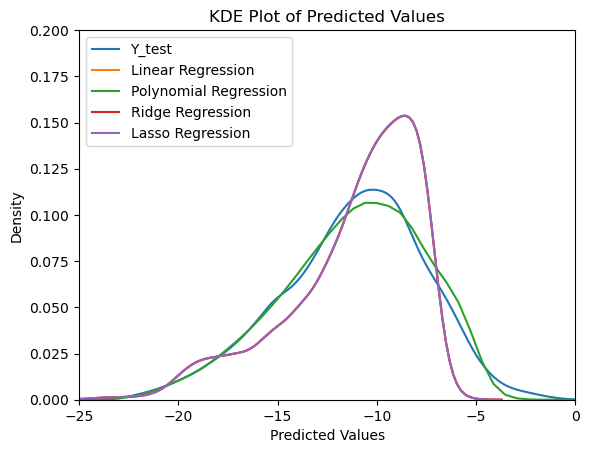

In [30]:
sns.kdeplot(Y_test,label='Y_test')
sns.kdeplot(Y_pred_lin,label='Linear Regression')
sns.kdeplot(Y_pred_poly,label='Polynomial Regression')
sns.kdeplot(Y_pred_ridge, label='Ridge Regression')
sns.kdeplot(Y_pred_lasso, label='Lasso Regression')

plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.title('KDE Plot of Predicted Values')
plt.legend()
plt.ylim([0,0.2]) 
plt.xlim([-25,0])
plt.show()

**Remark on the print-out:** We have plotted the least good performing models KDEs on the previous graph. We can see that the means of the Lasso, Ridge and Linear Regressions KDEs are shifted to bigger values and that there is an over-estimation of values between -20 and -18, and under-estimation for values of Atomization Energies from [-18, -12] and [-7, 0]. We can be sure to not consider those models for further developpement.

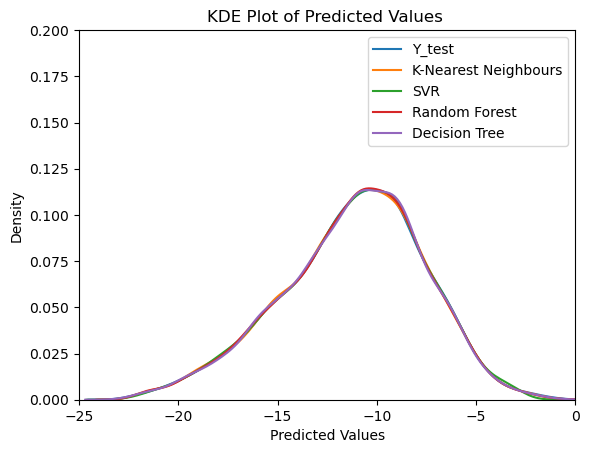

In [31]:
# Predicted values from different regression models
sns.kdeplot(Y_test,label='Y_test')
sns.kdeplot(Y_pred_knn, label='K-Nearest Neighbours')
sns.kdeplot(Y_pred_svr, label='SVR')
sns.kdeplot(Y_pred_rf, label='Random Forest')
sns.kdeplot(Y_pred_dt, label='Decision Tree')

plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.title('KDE Plot of Predicted Values ')
plt.legend()
plt.ylim([0,0.2]) 
plt.xlim([-25,0])
plt.show()

**Remark on the print-out:** We can see from the previous graph in which we have plotted the best 4 models KDEs, that the distribution of KNN, SVR and Tree models are a good approximation of the real density of values. We can visualy see that they align somewhat perfectly with Y_test's KDE.

### c) Kullback-Leibler (KL) divergence on Regression models
The KL divergence measures how one probability distribution diverges from a second, and it can be used to quantify the difference between two Gaussian Kernel Density Estimation (KDE). For this purpose we import gaussian_kde and entropy from scipy.stats library. The gaussian_kde function, in particular, uses Gaussian kernels (bell-shaped curves) to smooth the data and estimate the underlying distribution. We use them to get KDE models for different regression models.

In [32]:
from scipy.stats import gaussian_kde, entropy
import numpy as np

# Smooth KDE models 
kde_model1 = gaussian_kde(Y_test)
kde_model2 = gaussian_kde(Y_pred_Lin)
kde_model3 = gaussian_kde(Y_pred_rf)
kde_model4 = gaussian_kde(Y_pred_svr)
kde_model5 = gaussian_kde(Y_pred_dt)
kde_model6 = gaussian_kde(Y_pred_knn)

 Generate a set of x values to evaluate the previously computed distributions with linspace(minima,maxima,number of values), then apply the kde_model(x) and get the probability density functions(PDF) for each model, model1 obtained from the original Y_test dataframe( can be also done for Y).

In [33]:
# Generate a set of values to evaluate the distributions
x_values = np.linspace(min(Y), max(Y), 1000)

# Evaluate the KDEs at the specified x values
pdf_model1 = kde_model1(x_values)
pdf_model2 = kde_model2(x_values)
pdf_model3 = kde_model3(x_values)
pdf_model4 = kde_model4(x_values)
pdf_model5 = kde_model5(x_values)
pdf_model6 = kde_model6(x_values)

Now we can compute the relative entropy between the original Y's PDF and the model's PDF. The best entropy should be the one closest to zero.

In [34]:
# Calculate the KL divergence between the Original Outputs and Model outputs
kl_divergence_1_2 = entropy(pdf_model1, pdf_model2)
kl_div_1_3 = entropy(pdf_model1, pdf_model3)
kl_div_1_4 = entropy(pdf_model1, pdf_model4)
kl_div_1_5 = entropy(pdf_model1, pdf_model5)
kl_div_1_6 = entropy(pdf_model1, pdf_model6)

print('KL Divergence between Original data and')
print(">Linear Regression:", kl_divergence_1_2)
print('>Random Forest:', kl_div_1_3)
print('>SVR:',kl_div_1_4)
print('>Decision Tree:',kl_div_1_5)
print('>KNN:',kl_div_1_6,'\n')

KL Divergence between Original data and
>Linear Regression: 0.3355071200912604
>Random Forest: 0.00021424571361256287
>SVR: 0.0030651645885203718
>Decision Tree: 0.0002185175206636206
>KNN: 0.00019160973676891967 



As we want to get the response directly printed out, we proceed to create a dictionnary with models and there comparison to the original PDF's test set entropy.

In [35]:
# Choosing the minimum KL divergence
kl_dict = {
    'models': ['Linear Regression','Random Forest Regressor', 'SVR', 'Decision Tree Regressor','K Nearest Neighbours'],
    'kl_divergences':[kl_divergence_1_2, kl_div_1_3, kl_div_1_4, kl_div_1_5, kl_div_1_6],
    }

We can now search the best KL_div value by finding the minimum of kl_dict['kl_divergences'] and also find it's corresponding index.

In [36]:
#access the best vals of div and its name
best_kl_div = min(kl_dict['kl_divergences'])
best_kl_index = kl_dict['kl_divergences'].index(best_kl_div)

Finaly the best model's name is accessed with best_kl_index in kl_dict['models'] and printed-out.

In [37]:
best_model_name = kl_dict['models'][best_kl_index]
#Print out
print('Best KL Divergence:', best_kl_div)
print('Best Model by KL divergence is the', best_model_name)

Best KL Divergence: 0.00019160973676891967
Best Model by KL divergence is the K Nearest Neighbours


According to the KDE plots, we have found that Random Forest, Decision Tree, SVR and KNN were similar. Then by computing the KL divergence between these remaining models and Linear Regression for comparability in order of magnitude, we find that with the hyperparameters defined as before the best model in terms of KDE are in order KNN, Random Forest and Decision Tree.

Nevertheless we have learned that those models can be trained together to yield beter results with ensemble learning.

## IV) Ensemble Learning

In a final attempt to push the limits, we will perform ensembel learning by combining the three best method we have found with Stacking and Voting Regression. 

**GradientBoostingRegressor**

We implement Boosting with GradientBoostingRegressor() and first see if it's metrics are comparable to the three best model found earlier. If that is the case we will combine it with the rest of the models in a ensemble learning scheme. We import the method from sklearn.ensemble and contruct the object as gbr_model.

In [43]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()

We define a hyperparameter grid for GradientBoostingRegressor(), where the parameters are the number of estimators, learning rate and maximum depth.

In [58]:
gbr_param_grid = {
    'n_estimators': [50, 100, 150, 200, 250,300,350,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3,],
    'max_depth': [3, 4, 5]
}

Using the same X_train and Y_train from the begining we proceed to do a fitting and do the training. We use GridSearchCV with cv=4 to find the best set of parameters. Additionnaly we have put n_jobs=-1 to use all available processors to parallelize the cross-validation process. This can significantly speed up the grid search.

In [59]:
# Perform GridSearchCV
grid_search_gbr = GridSearchCV(gbr_model,gbr_param_grid, cv=4, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_gbr.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             scoring='neg_mean_squared_error')

We do a prediction of our model on X_test set and save it in the Y_pred_gbr array.

In [60]:
Y_pred_gbr = grid_search_gbr.predict(X_test)

We compute the metrics used before and print the results.

In [61]:
# Metrics
mse_gbr=mean_squared_error(Y_test, Y_pred_gbr)
r2_gbr=r2_score(Y_test, Y_pred_gbr)
gbr_best_params = grid_search_gbr.best_params_

print("GBR:")
print("Best Parameters:", best_params )
print("Mean Squared Error on the test set:",mse_gbr)
print("R^2:",r2_gbr)

GBR:
Best Parameters: {'alpha': 0.01}
Mean Squared Error on the test set: 0.09163039358830134
R^2: 0.9931004243979932


**Remark on the print-out:** We have here the best results available to us with Boosting.

#### Plotting the validation curve of GBR

We have procceded to  plot the learning curve of the GBR. It represents the MSE as a function of n_estimators. The goal here is to identify the n_estimators where the training score reaches a plateau or a slow decrease for which the increase of n_estimators can be considered as overfitting because it doesn't improve the model.

We define the range of the parameters with a grid containing the n_estimators: 50 to 250. The validation_curve is then computed with the best parameters of the GBR's gbr_param_grid, cv=5 and scoring with negative MSE.

In [62]:
print(gbr_best_params)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}


In [63]:
from sklearn.model_selection import validation_curve
param_range = gbr_param_grid['n_estimators']
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(learning_rate=gbr_best_params['learning_rate'], max_depth=gbr_best_params['max_depth']),
    X_train, Y_train,
    param_name="n_estimators", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

We compute the means of training and test scores for the next plot.

In [64]:
# Calculating mean of training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

We decide the size and other features of the elbow curve, as we plot the CV score and training score of the GBR.

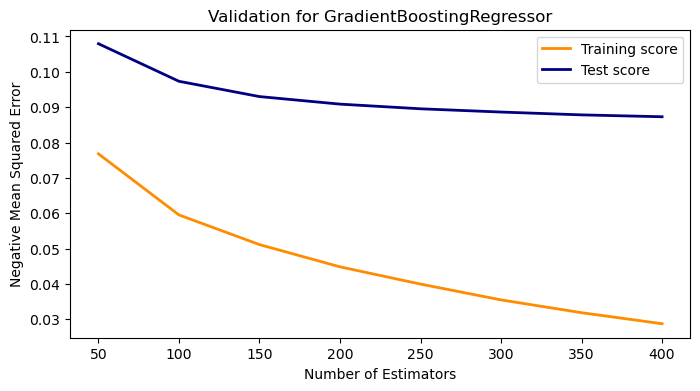

In [66]:
# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Test score", color="navy", lw=2)
plt.xlabel("Number of Estimators")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation for GradientBoostingRegressor")
plt.legend(loc="best")
plt.show()

**Remark on the print-out:** We observe that around n_estimators=[100,150] both curves commence to diverge from each other and the CV score reaches a plateau.

### Stacking Regressor 

Here we train multiple the best regression models and use the GBR as blender to combine the predictions.

We import the necessary libraries.

In [67]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.datasets import make_regression

We define the estimators list as the name and models.

In [68]:
estimators = [
    ('KNN',knn_model),
    ('Decision Tree',dt_model),
    ('GradiantBoost',gbr_model),
    ('Random Forest',rf_model)
]

We define the stacking regressor with the above list and use GBR as the final estimator.

In [69]:
sr = StackingRegressor(estimators = estimators, final_estimator = GradientBoostingRegressor())

We do the same procedure as before.

In [70]:
start_time = time.time()
sr.fit(X_train,Y_train)
end_time = time.time()
elapsed_time_sr = end_time - start_time

In [71]:
Y_pred_sr = sr.predict(X_test)

In [72]:
mse_sr = mean_squared_error(Y_test,Y_pred_sr)
r2_sr = r2_score(Y_test,Y_pred_sr)

In [73]:
print("Stacking Regressor:")
print('Time elapsed:',elapsed_time_sr)
print('Mean Squared Error:',mse_sr)
print('R^2:',r2_sr)

Stacking Regressor:
Time elapsed: 45.27062797546387
Mean Squared Error: 0.09143946154419991
R^2: 0.9931148011786828


**Remark on the print-out:** We observe that the R^2 is similar to GBR and the MSE is improved compared to GBR alone.

## Voting Regressor

The voting Regressor is an ensemble learning model that combine the predictions of the same multiple regression models defined as estimators as before. We can add voting weights corresponding to the importance given to the models within. A priour test has generated worst results than what is shown here, thus we chose to compute it without handpicked tunning.

In [74]:
from sklearn.ensemble import VotingRegressor

# Voting Regressor
voting_reg = VotingRegressor(estimators=estimators)

#start time and fitting
start_time = time.time()

voting_reg.fit(X_train, Y_train)

end_time = time.time()
elapsed_time_vote = end_time - start_time
# Prediction
Y_pred_vote = voting_reg.predict(X_test)

# Metrics
mse_vote = mean_squared_error(Y_test, Y_pred_vote)
r2_vote = r2_score(Y_test,Y_pred_vote)

print("Voting Regressor:")
print('Time elapsed:',elapsed_time_vote)
print('Mean Squared Error:',mse_vote)
print('R^2:',r2_vote)

Voting Regressor:
Time elapsed: 9.769724369049072
Mean Squared Error: 0.09072858509484023
R^2: 0.993168328677736


### Second stacking using the previous Stacking Regressor as input 

Lastly, we use the stacking method a second time using the first trained stacking regressor as the final_estimator to see if we get a better result.

In [75]:
sr2 = StackingRegressor(
        estimators = estimators,
        final_estimator=sr)

We use the same protocol as always.

In [76]:
#start time and fitting
start_time = time.time()

#Fit
sr2.fit(X_train, Y_train)

end_time = time.time()
elapsed_time_sr2 = end_time - start_time
# Prediction
Y_pred_sr2 = sr2.predict(X_test)

# Metrics
mse_sr2 = mean_squared_error(Y_test, Y_pred_sr2)
r2_sr2 = r2_score(Y_test,Y_pred_sr2)

print("Second stacking using the previous stacking as input:")
print('Time elapsed:',elapsed_time_sr2)
print('Mean Squared Error:',mse_sr2)
print('R^2:',r2_sr2)

Second stacking using the previous stacking as input:
Time elapsed: 70.69242978096008
Mean Squared Error: 0.0925100812430937
R^2: 0.9930341857708007


**Remark on the print-out:** We see that the results are not improving, we may stop here.

# Conclusion

In the table below we compared the ensemble learning methods.

In [78]:
ensemble = [
    ["Stacking Regressor", 45.27, 0.09143, 0.99311],
    ["Voting Regressor", 9.76, 0.09072, 0.99316],
    ["Second Stacking", 70.69, 0.09251,0.99303]
]

headers3 = ["Model", "Time elapsed", "Mean Squared Error", "R^2"]

table = tabulate(ensemble, headers3, tablefmt="fancy_grid")

print(table)

╒════════════════════╤════════════════╤══════════════════════╤═════════╕
│ Model              │   Time elapsed │   Mean Squared Error │     R^2 │
╞════════════════════╪════════════════╪══════════════════════╪═════════╡
│ Stacking Regressor │          45.27 │              0.09143 │ 0.99311 │
├────────────────────┼────────────────┼──────────────────────┼─────────┤
│ Voting Regressor   │           9.76 │              0.09072 │ 0.99316 │
├────────────────────┼────────────────┼──────────────────────┼─────────┤
│ Second Stacking    │          70.69 │              0.09251 │ 0.99303 │
╘════════════════════╧════════════════╧══════════════════════╧═════════╛


The Voting Regressor appears to be the best model among the three. It achieved the lowest MSE and the highest R^2, suggesting better predictive performance and a better fit to the data compared to the other models in the ensemble. Nevertheless it isn't better than the KNN Regression model in II), however slim the difference is. We can conclude that indeed the Stacking Regressor when used with KNN, Decision Tree, Random Forest and GradientBoost as blender does a good job to predict Atomization energies but takes more time and therefore an overkill. The K Neighrest Neighbors Regression fit checks most of the metric and visual inspection for a simple model.

**Addendum**: Some additionnaly found results with different parameter combination can be found in the text document: "Early results"